In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [2]:
import pandas as pd
import os

# Path to the directory containing audio files
audio_dir = 'esc50-dataset/dataset'

# Path to the metadata CSV file
metadata_file = 'esc50-dataset/esc50.csv'

# Load metadata into a Pandas dataframe
metadata = pd.read_csv(metadata_file)

# Filter metadata to include only needed label
dog_metadata = metadata[metadata['category'] == 'cat']

# Get list of audio filenames for filtered metadata
dog_files = dog_metadata['filename'].tolist()

# Construct list of full paths to audio files
dog_paths = [os.path.join(audio_dir, f) for f in dog_files]

In [3]:
ipd.Audio(dog_paths[1])

In [4]:
y, sr = librosa.load(dog_paths[1])
y.shape[0]

110250

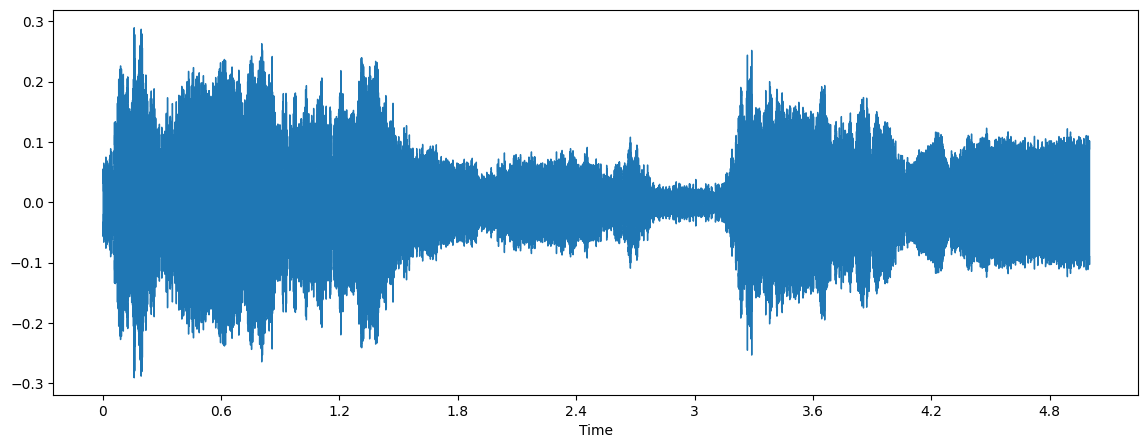

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.show()

In [6]:
import noisereduce as nr
# perform noise reduction
reduced_noise = nr.reduce_noise(y=y, sr=sr)

d:\Data_Science\Audio_processing\Animal\audio_analysis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


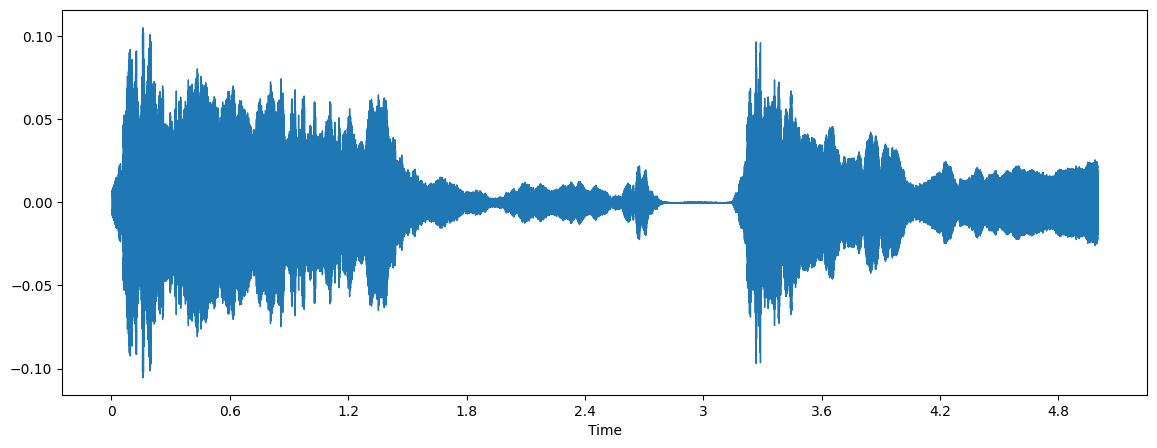

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(reduced_noise, sr=sr)
plt.show()

In [8]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

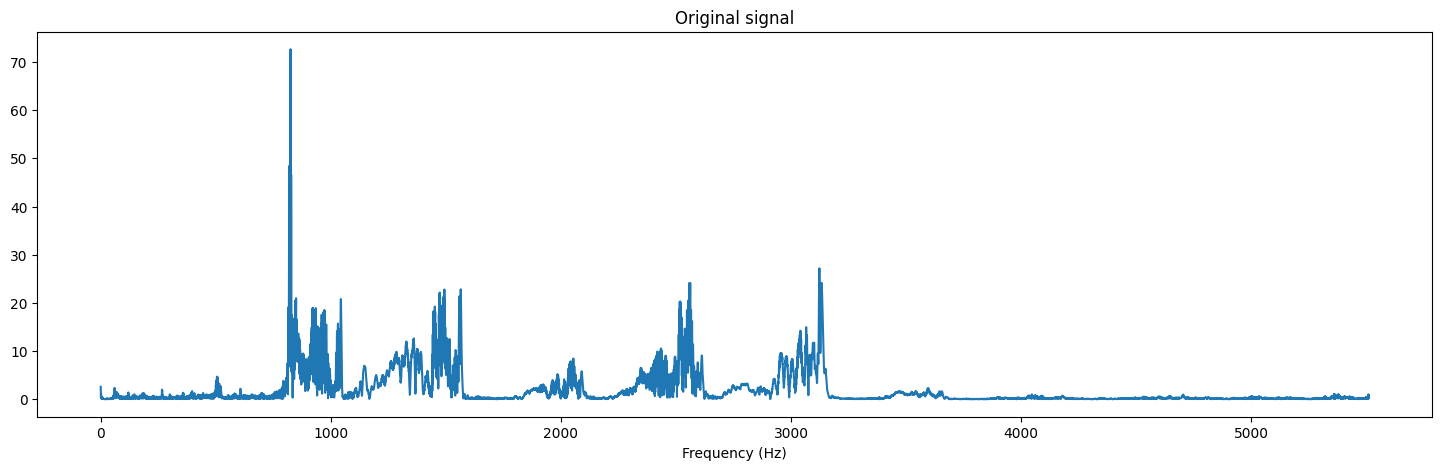

In [9]:
#cut only 1 sencond to 3 sencond of the audio
reduced_noise = reduced_noise[3*sr:5*sr]
plot_magnitude_spectrum(reduced_noise, sr, 'Original signal', 0.25)

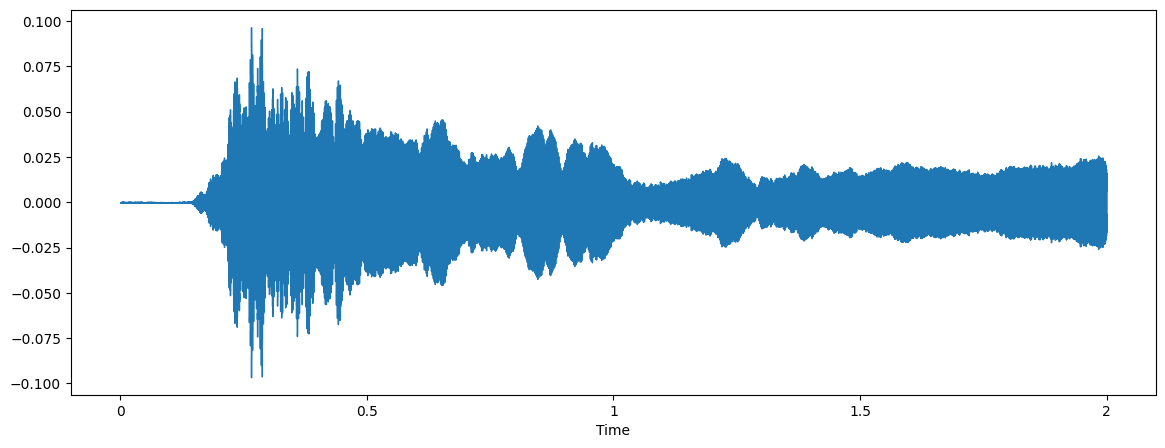

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(reduced_noise, sr=sr)
plt.show()

In [21]:
ipd.Audio(reduced_noise, rate=sr)

C:\Users\DeerChan\AppData\Local\Temp\ipykernel_6100\1190407896.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reduced_noise, kde=False, fit=stats.norm)


<Axes: >

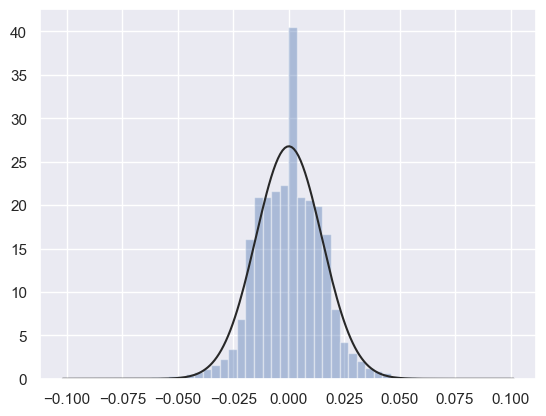

In [22]:
#plot pmf of the audio
import scipy.stats as stats
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(reduced_noise, kde=False, fit=stats.norm)

In [23]:
#culculate the mean and standard deviation
mean = np.mean(reduced_noise)
std = np.std(reduced_noise)
print(mean)
print(std)

5.8706817e-05
0.014895773


In [40]:
mfcc1 = librosa.feature.mfcc(y=reduced_noise, sr=sr, n_mfcc=13, win_length=256, hop_length=128)
mfcc2 = librosa.feature.mfcc(y=reduced_noise, sr=sr, n_mfcc=13, win_length=2048, hop_length=1024)
zcr = librosa.feature.zero_crossing_rate(y=reduced_noise, frame_length=1024, hop_length=256)
centroids = librosa.feature.spectral_centroid(y=reduced_noise, sr=sr, n_fft=1024, hop_length=256)
""" chroma = librosa.feature.chroma_stft(y=reduced_noise, sr=sr)
contrast = librosa.feature.spectral_contrast(y=reduced_noise, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=reduced_noise, sr=sr)
tonnetz = librosa.feature.tonnetz(y=reduced_noise, sr=sr) """
print(mfcc1.shape)
print(mfcc2.shape)

(13, 345)
(13, 44)


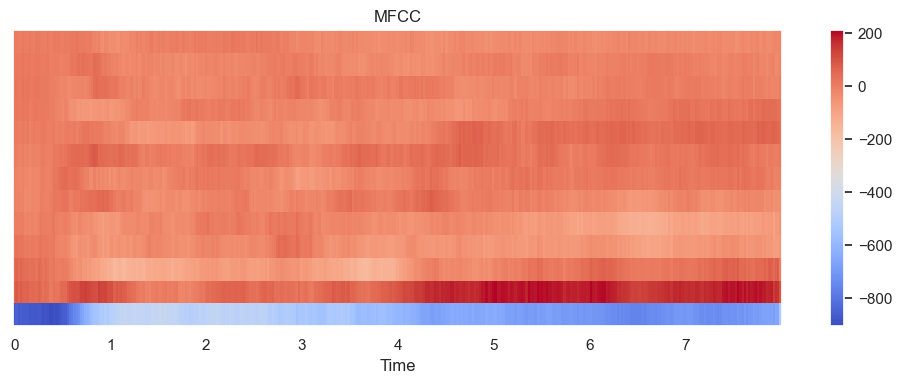

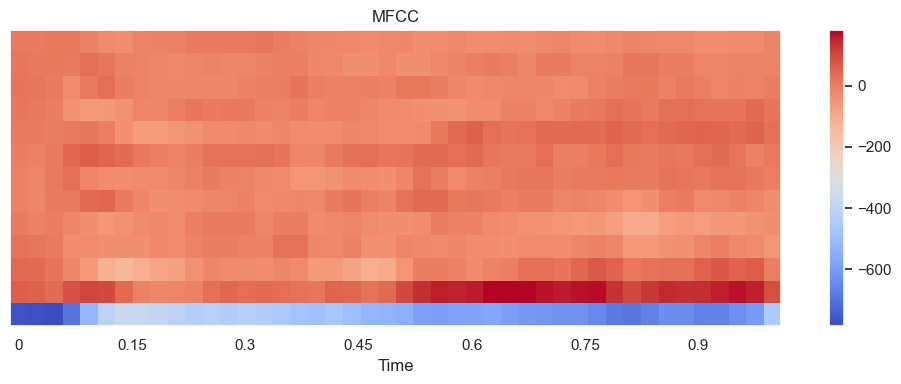

In [41]:
#Visualize the MFCC1
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc1, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()
#Visualize the MFCC2
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc2, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


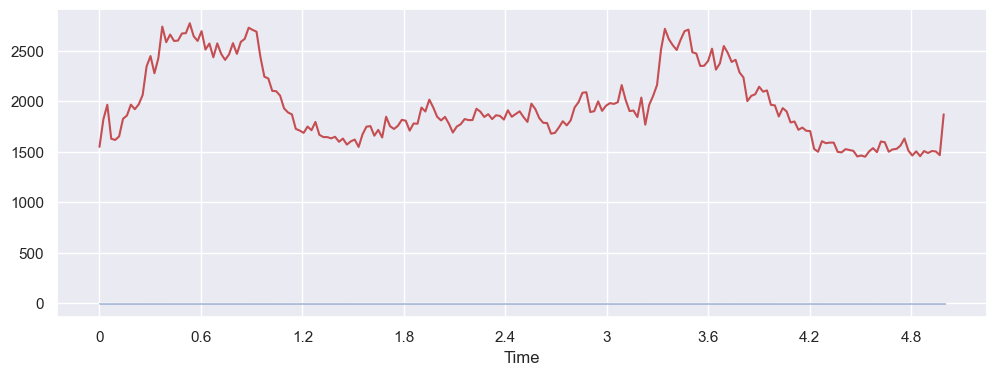

In [16]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

#extract spectral centroid for each frame
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

#Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

#visualize the spectral centroid along the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')
plt.show()


In [17]:
spectral_centroids.shape

(216,)

In [18]:
len(t)

216